In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



#data contains all recipe from https://www.bbc.co.uk/food
recipes = pd.read_json('/Users/svenkerstjens/PycharmProjects/irtm/recipescrape/BBC_recipes.json')

def column_to_columns(data,column):
    '''
    takes a column 'column' from a dataframe 'data' and creates an empty dataframe with a column for
    each distinct word in the column ( data in 'column' is of the form ['a','b','c'] )
    '''
    empty_df = pd.DataFrame(index=range(len(data)))
    for recipe in range(len(data)):
        for ingredient in data[column].iloc[recipe]:
            if ingredient not in empty_df:
                empty_df[ingredient]=0
    return empty_df

def fill_with_ones(empty_df,data,column):
    #Assign a 1 to each ingredient-column if the recipe contains that ingredient
    for j, recipe in enumerate(data.index):
        for ingredient in empty_df.columns:
            if ingredient in data[column].iloc[j]:
                empty_df[ingredient].iloc[j] = 1
                
def num_ingredients(df_column):
    ''' 
    return #ingredients and set of ingredeints
    '''
    ing_set = set()
    for i in df_column:
        for j in i:
            ing_set.add(j)
    print('We currently have', len(ing_set), 'ingredients')
    return len(ing_set), ing_set
            
num_ingredients(recipes['all_ingredients'])


stemmer = nltk.stem.PorterStemmer()

for i, x in enumerate(recipes['all_ingredients']):
    for j, y in enumerate(x):
        recipes['all_ingredients'][i][j]=recipes['all_ingredients'][i][j].lower()
        recipes['all_ingredients'][i][j]=re.sub(r'.*flour','flour'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'pappardelle|penne|tagliatelle|linguine|farfalle|fusilli|orecchiette|spaghetti|rigatoni','pasta'
                                                ,recipes['all_ingredients'][i][j])
        
        recipes['all_ingredients'][i][j]=re.sub(r'.*sugar','sugar'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*oil','oil'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*butter','butter'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*mushroom.*','mushroom'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*tomato.*','tomato'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*stock.*','stock'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*chicken.*','chicken'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*beef.*','beef'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*pork.*','pork'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*potato.*','potato'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*bread$','bread'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*cheese.*','cheese'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*vinegar','vinegar'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*bean.*','bean'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*onion.*','onion'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*duck.*','duck'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*honey.*','honey'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*fish$','fish'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*cream$','cream'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*milk$','milk'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'juice',''
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*noodles?','noodle'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]= stemmer.stem(recipes['all_ingredients'][i][j])
        

binary_ingredients = column_to_columns(recipes,'all_ingredients')
fill_with_ones(binary_ingredients,recipes,'all_ingredients')

num_ingredients(recipes['all_ingredients'])

tfidf_transformer = TfidfTransformer()
tfidf_ingredients = tfidf_transformer.fit_transform(binary_ingredients).toarray()
pca = PCA(n_components=2).fit(tfidf_ingredients)
data2d= pca.transform(tfidf_ingredients)


We currently have 1328 ingredients
We currently have 859 ingredients


AttributeError: tooling not found

silhouette score on 2 dimensions


-0.7042125522238357

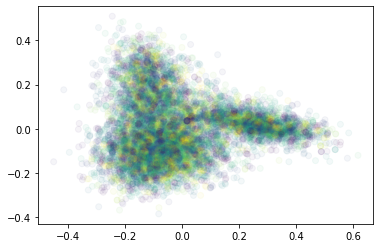

In [3]:
from sklearn.metrics import silhouette_score

kmeans2d = KMeans(n_clusters=1000)
k_meanslabel2d = kmeans2d.fit_predict(data2d)
plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05,c=k_meanslabel2d)
print('silhouette score on 2 dimensions')
silhouette_score(data2d,k_meanslabel2d, metric='cosine')

#print('silhouette score on 2 dimensions')


silhouette score on all dimensions


0.024088982131289096

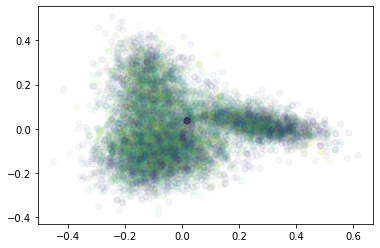

In [4]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=1000)
k_meanslabel = kmeans.fit_predict(tfidf_ingredients)
plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05,c=k_meanslabel)
print('silhouette score on all dimensions')
silhouette_score(tfidf_ingredients,k_meanslabel, metric='euclidean')

#print('silhouette score on 2 dimensions')


In [5]:
import random
randomlist = []
for i in range(0,3):
    n = random.randint(1,1000)
    randomlist.append(n)
    print(randomlist)
    
recipes

[126]
[126, 784]
[126, 784, 891]


name   preparation_time  \
0                                              Daiquiri  less than 30 mins   
1                                     Fabulous fish pie  less than 30 mins   
2     Dark chocolate, sea salted caramel, chocolate ...  less than 30 mins   
3                                     Daffodil biscuits          1-2 hours   
4     Date and toffee pudding with caramelised banan...          1-2 hours   
...                                                 ...                ...   
9814                                          Tabbouleh  less than 30 mins   
9815                         Tagliatelle alla carbonara  less than 30 mins   
9816             Tagliarini with artichoke and truffles  less than 30 mins   
9817  T-bone steak with roasted tomato butter, wilte...       over 2 hours   
9818  T-bone steak with bearnaise sauce and a green ...  less than 30 mins   

             cooking_time            serving  \
0       less than 10 mins           Serves 1   
1       30 mins to 1 hour               None   
2            1 to 2 hours           Serves 2   
3           10 to 30 mins  Makes 30 biscuits   
4           10 to 30 mins         Serves 6-8   
...                   ...                ...   
9814  no cooking required           Serves 4   
9815        10 to 30 mins                  4   
9816    less than 10 mins           Serves 2   
9817    30 mins to 1 hour           Serves 4   
9818    30 mins to 1 hour           Serves 2   

                                        all_ingredients  \
0                                   [sugar, rum, lime ]   
1     [milk, onion, fish, smoked haddock, salmon, eg...   
2     [dark chocol, butter, sugar, sea salt, cream, ...   
3     [butter, sugar, egg, bean, flour, baking powd,...   
4     [rum, vanilla pod, date, butter, sugar, egg, f...   
...                                                 ...   
9814  [bulgur wheat, tomato, parsley, mint, onion, l...   
9815  [oil, prosciutto, butter, white win, egg yolk,...   
9816  [globe artichok, oil, garlic, parsley, cream, ...   
9817  [thyme, oil, butter, black pepp, t-bone steak,...   
9818  [french dress, honey, vinegar, oil, shallot, g...   

                            ingredients_with_properties  \
0     [[100g/3½oz , caster sugar], l/2fl oz wate...   
1     [l/1 pint 1fl oz full-fat , milk], [1 , o...   
2     [[500g/1lb 2oz , dark chocolate,  (60% cocoa s...   
3     [[225g/8oz unsalted , butter, , at room temper...   
4     [l/5fl oz dark , rum], [1 , vanilla pod, ...   
...                                                 ...   
9814  [[25g/1oz , bulgur wheat], [2 large, ripe vine...   
9815  [[1 tbsp extra virgin , olive oil], [300g/10½o...   
9816  [[4 small , globe artichokes], [2 tbsp , olive...   
9817  [[6 tomatoes, halved and de-seeded], [3 sprigs...   
9818  [[2 tbsp , French dressing], [2 tbsp , honey],...   

                                       sub_recipe_names  \
0       [To make the sugar syrup, To make the cocktail]   
1                    [For the filling, For the topping]   
2     [For the crumpled chocolate bowl, For the sea ...   
3                                         [To decorate]   
4                                [For the toffee sauce]   
...                                                 ...   
9814                                                 []   
9815                                                 []   
9816                                                 []   
9817  [For the roasted tomato butter, For the T-bone...   
9818  [For the dressing, For the deep-fried onion ri...   

                                 sub_recipe_ingredients  \
0     [[100g/3½oz , caster sugar, 50ml/2fl oz water]...   
1     [l/1 pint 1fl oz full-fat , milk, 1 , oni...   
2     [[500g/1lb 2oz , dark chocolate,  (60% cocoa s...   
3     [[225g/8oz unsalted , butter, , at room temper...   
4     [l/5fl oz dark , rum, 1 , vanilla pod, , ...   
...                                                 ...   
9814  [[25g/1oz , bul

In [7]:
recipes['kmeans'] = k_meanslabel
tfidf = pd.DataFrame(tfidf_ingredients)
tfidf.columns = binary_ingredients.columns
recipes = pd.concat([recipes,tfidf], axis=1)
#recipes['agglomerative'] = agg_cluster_labels
#recipes[recipes['kmeans']==3 or recipes['kmeans']==10 or recipes['kmeans']==349 or recipes['kmeans']==89 or recipes['kmeans']==344 or recipes['kmeans']==749 ]

Empty DataFrame
Columns: [name, preparation_time, cooking_time, serving, all_ingredients, ingredients_with_properties, sub_recipe_names, sub_recipe_ingredients, methods, author, description, kmeans, sugar, rum, lime , milk, onion, fish, smoked haddock, salmon, egg, butter, flour, white win, cream, dill, black pepp, potato, cheddar, dark chocol, sea salt, cocoa powd, honey, vanilla extract, salt, bean, baking powd, food colour, vanilla pod, date, bicarbonate of soda, banana, golden syrup, treacl, coffe, coffee ess, stem ging, biscuit, carrot, porridg, dried fruit, cinnamon, thyme, oil, parsley, oregano, garlic, chilli, cumin, paprika, shallot, vinegar, pepper, stock, chickpea, coffee granul, walnut, tea, bread, yeast, peel, orang, peach, raspberri, brioch, almond ess, egg yolk, pineappl, polenta, manchego, spinach, nutmeg, sage, tomato, breadcrumb, fresh coriand, dried chilli, goat, saffron, raisin, rosemari, allspic, coriand, harissa, aubergin, lemon, tahini, lemon , pine nut, mint, ...]
Index: []

[0 rows x 873 columns]

silhouette score on 2 dimensions


0.4102405613460654

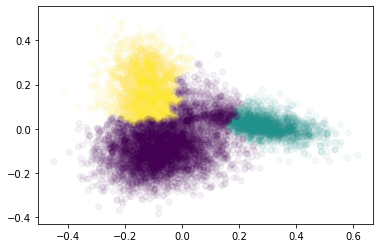

In [10]:
#exploratory
#print('silhouette score on 3 dimensions')

agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
agg_cluster_labels = agg_cluster.fit_predict(data2d)
plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05, c=agg_cluster_labels)
print('silhouette score on 3 dimensions')
silhouette_score(data2d,agg_cluster_labels, metric='euclidean')

In [11]:
silhouette_score(tfidf_ingredients,agg_cluster_labels, metric='euclidean')

0.01975966290053955

0.02653278731424378

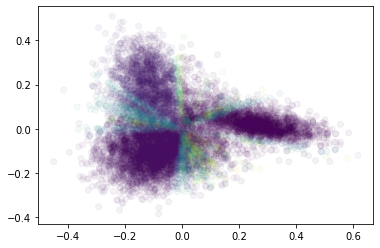

In [12]:

dbscan = DBSCAN(eps=0.00001, min_samples=10,metric='cosine')
dbscanlabel = dbscan.fit_predict(data2d)
plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05,c=dbscanlabel)
dbscan.labels_
silhouette_score(data2d,dbscanlabel, metric='cosine')

eps = 0.0001. silh=0.10809268322232765
eps = 9.1e-05. silh=0.09678049591745977
eps = 8.2e-05. silh=-0.005349646345920467
eps = 7.300000000000001e-05. silh=-0.00068178557841783
eps = 6.400000000000001e-05. silh=-0.004267472227042352
eps = 5.5e-05. silh=-0.010615386191672963
eps = 4.600000000000001e-05. silh=-0.018507921702812857
eps = 3.7000000000000005e-05. silh=-0.014767542876732482
eps = 2.8000000000000003e-05. silh=0.26790073553183574
eps = 1.9e-05. silh=0.015922675777365527
eps = 1e-05. silh=0.02653278731424378


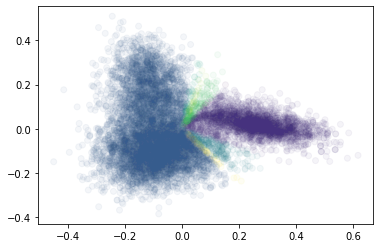

In [14]:
#DBSCAN

for i in np.linspace(0.0001,0.00001,11):
    dbscan = DBSCAN(eps=i, min_samples=10,metric='cosine')
    dbscanlabel = dbscan.fit_predict(data2d)
    #plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05,c=dbscanlabel)
    print('eps = {}. silh={}'.format(i,silhouette_score(data2d,dbscanlabel,metric='cosine')))
dbscan = DBSCAN(eps=0.00009, min_samples=10,metric='cosine')
dbscanlabel = dbscan.fit_predict(data2d)
plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05,c=dbscanlabel)

In [ ]:
#AGGLOMERATIVE

#for i in range(2,10):
 #   agg_cluster = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='cosine')
#    agg_cluster_labels = agg_cluster.fit_predict(data2d)
#    #plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05, c=agg_cluster_labels)
 #   print('silhouette score for n_clusters = {}: {})'.format(i,silhouette_score(data2d,agg_cluster_labels,metric='cosine')))
    
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='cosine')
agg_cluster_labels = agg_cluster.fit_predict(data2d)
plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05, c=agg_cluster_labels)
print('silhouette score for n_clusters = 3: {})'.format(i,silhouette_score(data2d,agg_cluster_labels,metric='cosine')))

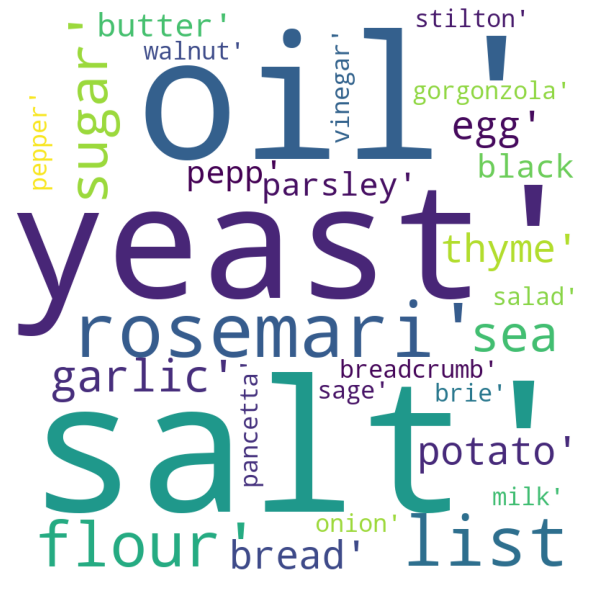

[126, 784, 891]


In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

  

  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(recipes[recipes['kmeans']==232]['all_ingredients'].values))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
print(randomlist)


silhouette score on 50 dimensions
-0.24839679878433724


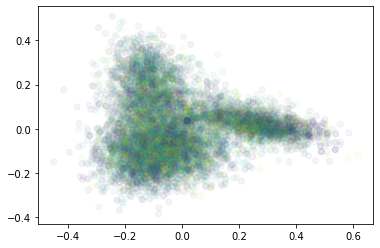

In [19]:
#exploratory
from sklearn.metrics import silhouette_score
data50d = PCA(n_components=50).fit_transform(tfidf_ingredients)
kmeans50d = KMeans(n_clusters=1000)
k_meanslabel50d = kmeans50d.fit_predict(tfidf_ingredients)
plt.scatter(data2d[:,0], data2d[:,1], alpha=0.05,c=k_meanslabel50d)
print('silhouette score on 50 dimensions')
print(silhouette_score(data50d,k_meanslabel50d, metric='cosine'))

#print('silhouette score on 2 dimensions')

<Figure size 14400x9600 with 0 Axes>

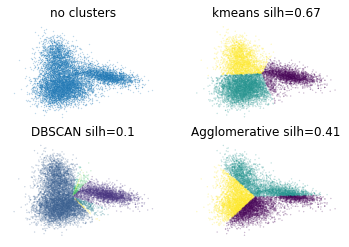

In [20]:
#KMEANS
kmeans2label = KMeans(n_clusters=3).fit_predict(data2d)

plt.figure(dpi=2400)
fig, axs = plt.subplots(2, 2)
axs[0,0].scatter(data2d[:,0], data2d[:,1], alpha=0.4,s=0.1 ,cmap='viridis')
axs[0,0].set_title('no clusters')
axs[0,0].axis('Off')
axs[0,1].scatter(data2d[:,0], data2d[:,1], alpha=.4,s=0.1 ,cmap='viridis',c=kmeans2label)
axs[0,1].set_title('kmeans silh={}'.format(round(silhouette_score(data2d,kmeans2label,metric='cosine'),2)))
axs[0,1].axis('Off')
axs[1,0].scatter(data2d[:,0], data2d[:,1], alpha=0.4,s=0.1 ,cmap='viridis',c=dbscanlabel)
axs[1,0].set_title('DBSCAN silh={}'.format(round(silhouette_score(data2d,dbscanlabel,metric='cosine'),2)))
axs[1,0].axis('Off')
axs[1,1].scatter(data2d[:,0], data2d[:,1], alpha=0.4,s=0.1 ,cmap='viridis',c=agg_cluster_labels)
axs[1,1].set_title('Agglomerative silh={}'.format(round(silhouette_score(data2d,agg_cluster_labels,metric='cosine'),2)))
axs[1,1].axis('Off')
plt.savefig('clustering_methods.png')
plt.show()


In [21]:
#kmeans tfidf
from sklearn.cluster import MiniBatchKMeans
mini_silh=[]
for i in np.linspace(700,1500,9 ,dtype='int'):
    minikmeans = MiniBatchKMeans(n_clusters=i,batch_size=100)
    minikmeanslabels = minikmeans.fit_predict(tfidf_ingredients)
    silh = round(silhouette_score(tfidf_ingredients,minikmeanslabels),3)
    mini_silh.append(silh)
    
    print('n_clusters = {}. silh_score = {}'.format(i,silh))

n_clusters = 700. silh_score = -0.07
n_clusters = 800. silh_score = -0.066
n_clusters = 900. silh_score = -0.048
n_clusters = 1000. silh_score = -0.062
n_clusters = 1100. silh_score = -0.042
n_clusters = 1200. silh_score = -0.044
n_clusters = 1300. silh_score = -0.05
n_clusters = 1400. silh_score = -0.045
n_clusters = 1500. silh_score = -0.039


In [22]:
#kmeans 2d
mini_silh=[]
for i in np.linspace(700,1500,9 ,dtype='int'):
    minikmeans = MiniBatchKMeans(n_clusters=i,batch_size=100)
    minikmeanslabels = minikmeans.fit_predict(data2d)
    silh = round(silhouette_score(data2d,minikmeanslabels),3)
    mini_silh.append(silh)
    
    print('n_clusters = {}. silh_score = {}'.format(i,silh))

n_clusters = 700. silh_score = 0.319
n_clusters = 800. silh_score = 0.292
n_clusters = 900. silh_score = 0.302
n_clusters = 1000. silh_score = 0.304
n_clusters = 1100. silh_score = 0.299
n_clusters = 1200. silh_score = 0.305
n_clusters = 1300. silh_score = 0.31
n_clusters = 1400. silh_score = 0.317
n_clusters = 1500. silh_score = 0.315


In [23]:
#agglomerative 2d
from sklearn.cluster import MiniBatchKMeans
agg_silh=[]
for i in np.linspace(700,1500,9 ,dtype='int'):
    agg = AgglomerativeClustering(n_clusters=i,linkage='complete',affinity='cosine')
    agg_labels = agg.fit_predict(data2d)
    silh = round(silhouette_score(data2d,agg_labels,metric='cosine'),3)
    agg_silh.append(silh)
    
    print('n_clusters = {}. silh_score = {}'.format(i,silh))
    


n_clusters = 700. silh_score = 0.669
n_clusters = 800. silh_score = 0.677
n_clusters = 900. silh_score = 0.688
n_clusters = 1000. silh_score = 0.694
n_clusters = 1100. silh_score = 0.702
n_clusters = 1200. silh_score = 0.708
n_clusters = 1300. silh_score = 0.714
n_clusters = 1400. silh_score = 0.716
n_clusters = 1500. silh_score = 0.719


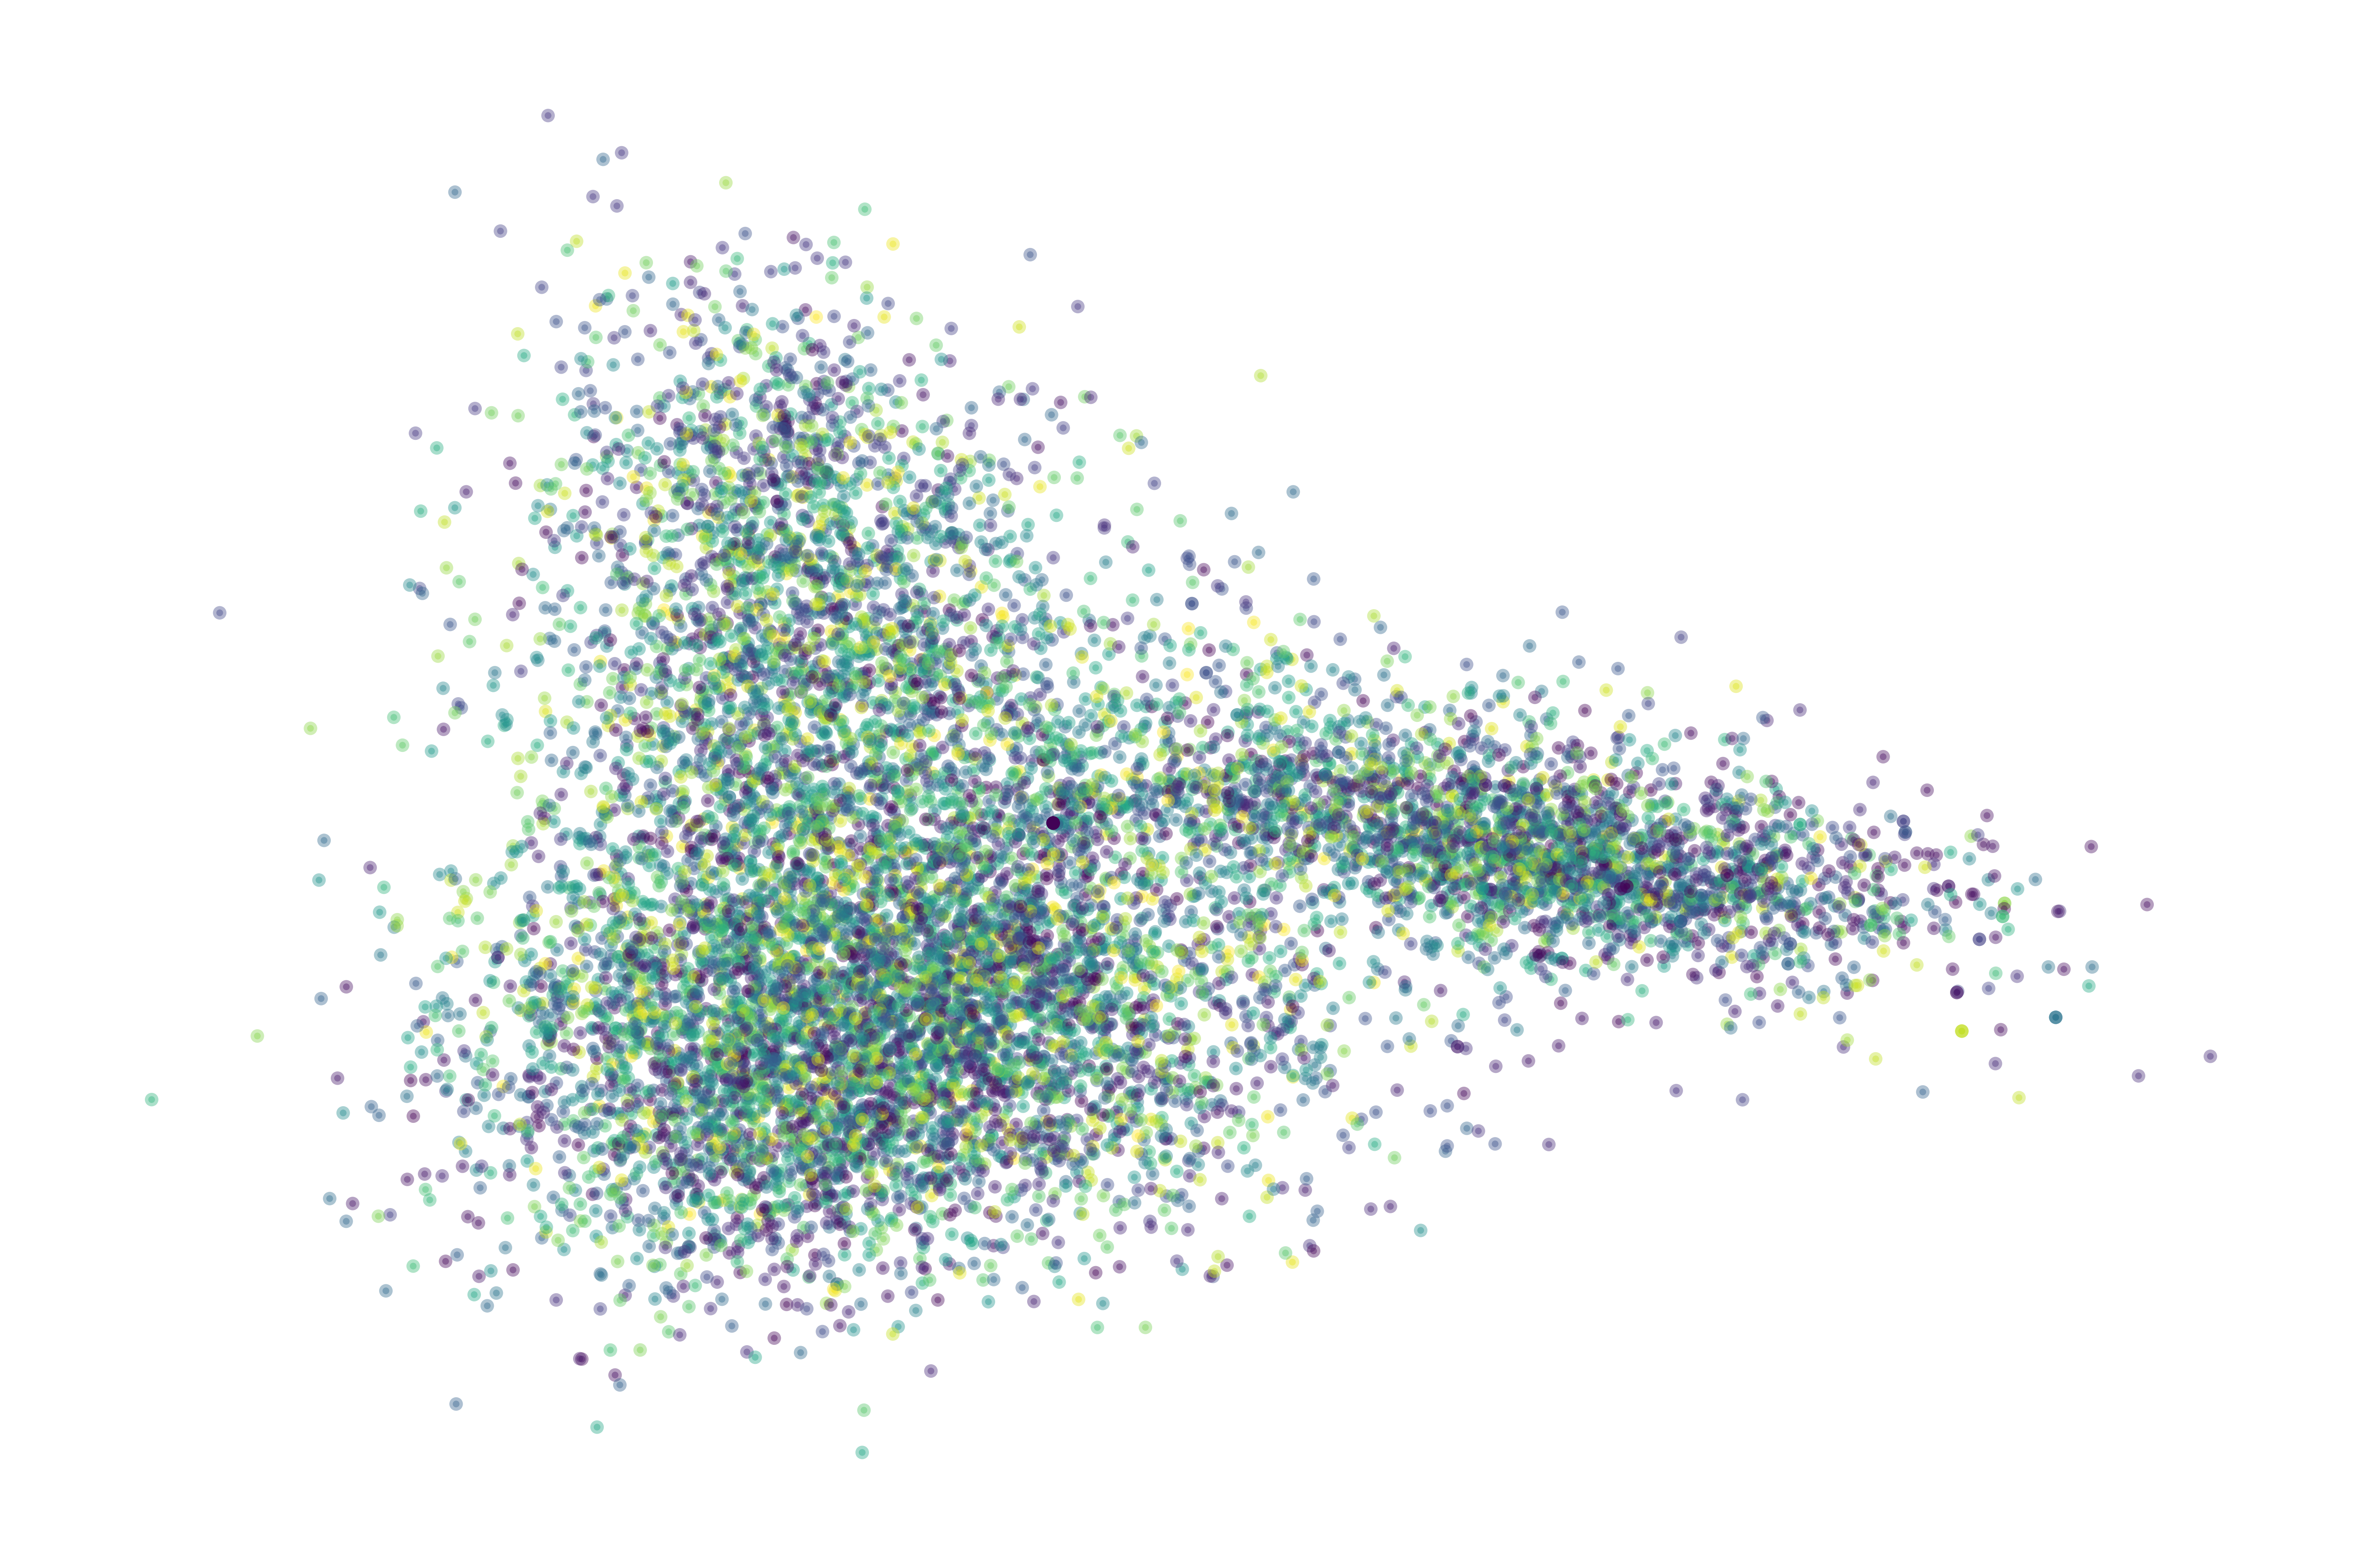

In [24]:
plt.figure(dpi=1200)
plt.scatter(data2d[:,0], data2d[:,1], alpha=.4,s=1 ,cmap='viridis',c=k_meanslabel)
plt.savefig('manyclusters.png')
plt.axis('Off')
plt.show()

In [26]:


#agglomerative tfidf
agg_silh=[]

tfidf_nozero = tfidf_ingredients[~np.all(tfidf_ingredients == 0, axis=1)]
for i in np.linspace(700,1500,9 ,dtype='int'):
    agg = AgglomerativeClustering(n_clusters=i,linkage='average',affinity='cosine')
    agg_labels = agg.fit_predict(tfidf_nozero)
    silh = round(silhouette_score(tfidf_nozero,agg_labels,metric='cosine'),3)
    agg_silh.append(silh)
    
    print('n_clusters = {}. silh_score = {}'.format(i,silh))
    

n_clusters = 700. silh_score = 0.072
n_clusters = 800. silh_score = 0.077
n_clusters = 900. silh_score = 0.08
n_clusters = 1000. silh_score = 0.081
n_clusters = 1100. silh_score = 0.083
n_clusters = 1200. silh_score = 0.084
n_clusters = 1300. silh_score = 0.086
n_clusters = 1400. silh_score = 0.087
n_clusters = 1500. silh_score = 0.092


In [ ]:
agg_silh